In [13]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


# Build a artifical neural network

# Import Libraries

In [1]:
# mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Import Dataset

In [3]:
data=pd.read_csv("mnist.csv")# contains universally accepted dataset which contains handwritten numbers
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
features=data.drop('label',axis=1)
labels=data['label']

# Normalization

In [6]:
features=features/255.0

In [7]:
# Convert features and labels to numpy
features=np.array(features)
labels=np.array(labels)

In [8]:
# Reshape the features into expetced input shape
features=features.reshape(-1, 28,28)# Converting rows into columns

In [9]:
# reshape the labels
labels=labels.reshape(-1)
labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

# Build ANN Model

In [11]:
model=keras.Sequential(       #input->hidden->output
    [
        #input layer
        keras.layers.Flatten(input_shape=(28,28)), #28*28 images in 1d array
        #Hidden layer
        keras.layers.Dense(128, activation='relu'), #Fully connect layer with 128 neurons and RElu activation
        keras.layers.Dropout(0.2), #Prevent overfitting 20% switch off neurons
        #Output layer
        keras.layers.Dense(10,activation="softmax") #Softmax activation function 10-(0-9) digits
    ]
)

C:\Users\Varsha Arun\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
#Compile
model.compile(optimizer='adam',  # Find the weight=Wi*Xi
             loss='sparse_categorical_crossentropy',  #since it is multiple classification we use entropy= Minimize the loss
              metrics=['accuracy']
             )

# Train the model

In [14]:
model.fit(features,labels,epochs=5)

Epoch 1/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8409 - loss: 0.5397
Epoch 2/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9498 - loss: 0.1710
Epoch 3/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9646 - loss: 0.1189
Epoch 4/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9722 - loss: 0.0878
Epoch 5/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9759 - loss: 0.0763
Epoch 6/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9784 - loss: 0.0682
Epoch 7/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9836 - loss: 0.0532
Epoch 8/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9834 - loss: 0.0522
Epoch 9/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9845 - loss: 0.0469
Epoch 10/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9850 - loss: 0.0414
Epoch 11/20
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9897 - loss: 0.0361
Epoch 12/20
1313/1313 ━━━━━━━

# Predict the result

In [16]:
predictions=model.predict(features)  # This is not recommended

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


# Visualise the result

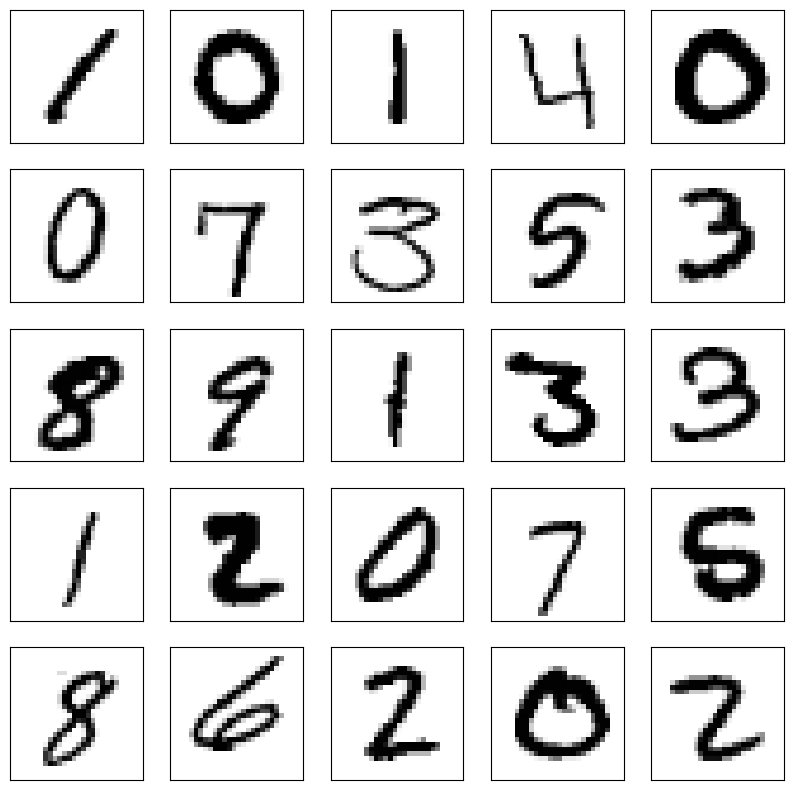

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(features[i], cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions[i])
    true_label=labels[i]
    if predicted_label == true_label:
        color='green'
    else:
        color='red'
        
    #plt.xlabel(f"Pred: {predicted_label}, True:{true_label}",color)
plt.show()